Python Visualization for Exploration of Data
By Rahul Kini

In this lesson we will investigate methods for the exploration of data using visualization techniques based on Stephen Elston's python tutorial in Seattle. We will use several Python packages to create the visualizations, matplotlib, Pandas plotting, and seaborn.
For these lessons we will be working with a data set containing the prices and characteristics of a number of automobiles. The ultimate goal is to build a model for predicting the price of a car from its characteristics.
About this Jupyter Notebook
This notebook contains material to help you learn how to explore data visually. 
The data set can be downloaded from OpenPV: https://openpv.nrel.gov/search 

This notebook was constructed using the Anconda 3.5 Python distribution. If you are not running version Anaconda 3.5 or higher, we suggest you update your Anaconda distribution now. You can download the Python 3 Anaconda distribution for your operating system from the 
To run this notebook you need the Seaborn graphics packages. If you have not done so, you will need to install Seaborn as it is not in the Anaconda distribution as of now. From a command prompt on your computer type the following command. If no errors occur, you will have installed Seaborn.
pip install seaborn
or
conda install seaborn
You can find more about installing seaborn can be seen on the Installing and getting started page.

In [1]:
# Full OpenPV Dataset by NREL.gov can be found at https://maps-api.nrel.gov/open_pv/installs/download_all
import pandas as pd
solar=pd.read_csv('openpv_all.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,5,8,12,13,14,15,16,20,23,25,26,27,28,32,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:

solar.head()

,state,date_installed,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,...,new_constr,effic_1,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,3rdparty
0,TX,12/12/2013,Austin Energy,uir,10.560,NaN,78702.0,residential,NaN,2.897777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TX,07/11/2014,Austin Energy,uir,12.720,NaN,78702.0,residential,NaN,3.144654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TX,01/17/2014,Austin Energy,uir,5.400,NaN,78702.0,residential,NaN,4.197330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IN,10/06/2017,NaN,uir,6.785,NaN,47403.0,Residential,Whole Sun Designs,2.590000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IN,10/06/2017,NaN,uir,4.720,NaN,47408.0,Residential,Whole Sun Designs,2.570000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
solar=solar[solar['size_kw']>10]
solar=solar[solar['size_kw']<1000000]
solar=solar[solar['cost_per_watt']>0]
solar=solar[solar['cost_per_watt']<1000000]

In [4]:
solar.head()


,state,date_installed,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,...,new_constr,effic_1,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,3rdparty
0,TX,12/12/2013,Austin Energy,uir,10.56,NaN,78702.0,residential,NaN,2.897777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TX,07/11/2014,Austin Energy,uir,12.72,NaN,78702.0,residential,NaN,3.144654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,IN,10/13/2017,NaN,uir,12.39,NaN,47429.0,Residential,Whole Sun Designs,2.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,IN,11/09/2017,NaN,uir,12.39,NaN,47401.0,Residential,Whole Sun Designs,2.580000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,TX,12/18/2012,Austin Energy,uir,15.18,NaN,78702.0,residential,NaN,3.024045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


'Done'

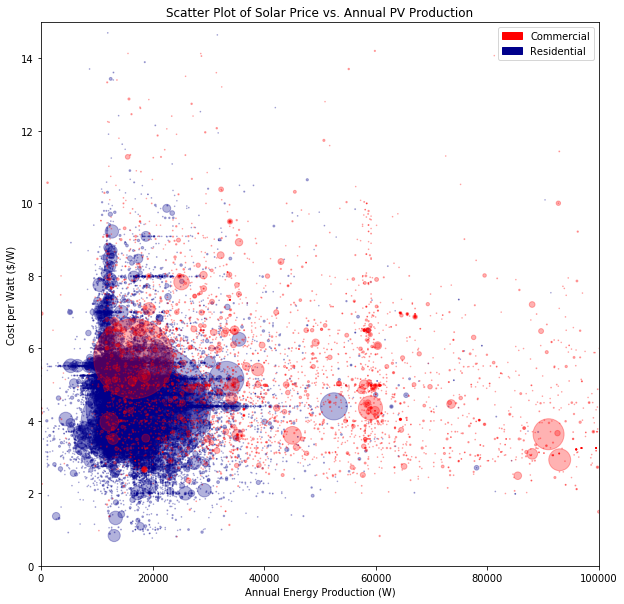

In [22]:

def solar_size_2(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['install_type'] == 'residential']       
        temp2 = df.ix[df['install_type'] == 'commercial']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'cost_per_watt' , 
                           ax = ax, color = 'DarkBlue', s= .02 * solar['size_kw']**1.3, 
                       alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'cost_per_watt' , 
                           ax = ax, color = 'Red', s= .02 * solar['size_kw']**1.3, 
                       alpha = 0.3) 
    ax.set_title('Scatter Plot of Solar Price vs. Annual PV Production')
    red_patch = mpatches.Patch(color='Red', label='Commercial')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Residential')
    plt.legend(handles=[red_patch, blue_patch])
    plt.xlim(0,1e5)
    plt.ylim(0,15)
    plt.xlabel('Annual Energy Production (W)')
    plt.ylabel('Cost per Watt ($/W)')
    plt.savefig('Solar_Price_vs_Production.png')
    return 'Done'
solar_size_2(solar, ['reported_annual_energy_prod']) 